In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel('audiencias_2004_2022.xlsx')
df['FECHA'] = pd.to_datetime(df['FECHA'], format='%d-%m-%Y', errors='coerce')

In [5]:
categorias = {
    'ENERGIA Y MINERIA': ['ENERGIA', 'MINERIA', 'HIDROCARBUROS', 'YPF', 'GAS', 'ELECTRICA', 'NUCLEAR', 'RENOVABLE', 'PETROLEO', 'LITIO', 'VACA MUERTA', 'EDENOR', 'EDESUR'],
    'AGROINDUSTRIA': ['AGRICULTURA', 'GANADERIA', 'PESCA', 'AGRO', 'SENASA', 'INTA', 'RURAL', 'SOJA', 'CAMPO', 'CEREAL', 'FRIGORIFICO', 'COSECHA', 'TRIGO', 'MAIZ', 'CARNE'],
    'INFRAESTRUCTURA Y VIVIENDA': ['OBRAS', 'VIALIDAD', 'VIVIENDA', 'HABITAT', 'CONSTRUCCION', 'CLOACAS', 'AYSA', 'INFRAESTRUCTURA', 'ARQUITECTURA', 'PLANIFICACION FEDERAL'],
    'FINANZAS Y ECONOMIA': ['HACIENDA', 'ECONOMIA', 'FINANZAS', 'BANCO', 'IMPUESTO', 'AFIP', 'ADUANA', 'CREDITO', 'DEUDA', 'INVERSION', 'BCRA', 'FMI', 'DOLAR', 'CASA DE MONEDA'],
    'INDUSTRIA Y COMERCIO': ['INDUSTRIA', 'PRODUCCION', 'COMERCIO', 'PYME', 'UIA', 'EXPORTA', 'IMPORTA', 'MERCADO', 'FABRICA', 'EMPRENDEDORES', 'SAS', 'PRODEPRO'],
    'SALUD Y AMBIENTE': ['SALUD', 'AMBIENTE', 'COVID', 'PANDEMIA', 'HOSPITAL', 'PAMI', 'VACUNA', 'ANMAT', 'OBRAS SOCIALES', 'PREPAGAS', 'LABORATORIO'],
    'EDUCACION Y CIENCIA': ['EDUCACION', 'CIENCIA', 'CONICET', 'UNIVERSIDAD', 'TECNOLOGIA', 'BECAS', 'DOCENTE', 'INVESTIGACION', 'MINCYT', 'ESCUELA'],
    'JUSTICIA Y DERECHOS': ['JUSTICIA', 'DDHH', 'DERECHOS', 'LEGAL', 'JURIDICO', 'FISCAL', 'JUEZ', 'CORTE', 'PENAL', 'ABOGADOS'],
    'TRABAJO Y GREMIOS': ['MINISTERIO DE TRABAJO', 'EMPLEO', 'SINDICATO', 'GREMIO', 'UPCN', 'ATE', 'PARITARIA', 'CGT', 'CTA', 'DESPIDOS', 'UOCRA', 'SMATA'],
    'TRANSPORTE Y TICS': ['TRANSPORTE', 'VIAL', 'AEREO', 'TREN', 'SUBTE', 'FERROCARRIL', 'ENACOM', 'TIC', 'AEROLINEAS', 'CONECTIVIDAD', 'AA2000', 'TELECOMUNICACIONES'],
    'SOCIAL, CULTURA Y DEPORTE': ['SOCIAL', 'POBREZA', 'CULTURA', 'DEPORTE', 'TURISMO', 'ANSES', 'JUBILADOS', 'INCAA', 'AFA', 'ALIMENTAR'],
    'SEGURIDAD Y DEFENSA': ['SEGURIDAD', 'DEFENSA', 'POLICIA', 'MILITAR', 'GENDARMERIA', 'NARCO', 'FFAA', 'EJERCITO', 'PNA', 'PREFECTURA'],
    'RELACIONES EXTERIORES': ['EXTERIORES', 'CANCILLERIA', 'CULTO', 'EMBAJADA', 'CONSULADO', 'DIPLOMATICO', 'MERCOSUR', 'BILATERAL'],
    'GESTION FEDERAL': ['MUNICIPIO', 'INTENDENTE', 'PROVINCIA', 'GOBERNADOR', 'CONCEJO', 'SENADO', 'DIPUTADO', 'LEGISLATURA', 'JEFATURA DE GABINETE', 'PRESIDENCIA', 'MINISTERIO DEL INTERIOR']
}

#si la dependencia del obligado es alguno de estos, miramos el tema en vez del cargo.
organismos_gral = ['JEFATURA DE GABINETE', 'PRESIDENCIA', 'SENADO', 'DIPUTADO', 'CONGRESO', 'GOBERNADOR', 'MUNICIPIO', 'SECRETARIA GENERAL', 'LEGISLADOR', 'LEGISLACION']

In [12]:
def clasificar_audiencia(fila):
    dep = str(fila['OBLIGADO_DEPENDENCIA']).upper()
    tema = str(fila['MOTIVO_DETALLE']).upper()

    for org in organismos_gral:
        if org in dep:
            for cat, palabras in categorias.items():
                for p in palabras:
                    if p in tema: return cat
            return 'GESTION FEDERAL'

    for cat, palabras in categorias.items():
        for p in palabras:
            if p in dep: return cat

    for cat, palabras in categorias.items():
        for p in palabras:
            if p in tema: return cat

    return 'OTROS'

In [16]:
df['CATEGORIA'] = df.apply(clasificar_audiencia, axis=1)

In [17]:
df['CATEGORIA'].value_counts(normalize=True)

,proportion
CATEGORIA,
GESTION FEDERAL,0.200690
INFRAESTRUCTURA Y VIVIENDA,0.151721
INDUSTRIA Y COMERCIO,0.071510
TRANSPORTE Y TICS,0.069989
TRABAJO Y GREMIOS,0.067109
"SOCIAL, CULTURA Y DEPORTE",0.067049
EDUCACION Y CIENCIA,0.060863
SALUD Y AMBIENTE,0.055843
FINANZAS Y ECONOMIA,0.055681


In [18]:
def gobierno(fecha):
    if pd.isnull(fecha): return None
    if fecha < pd.Timestamp('2007-12-10'): return 'Néstor Kirchner'
    if fecha < pd.Timestamp('2011-12-10'): return 'CFK I'
    if fecha < pd.Timestamp('2015-12-10'): return 'CFK II'
    if fecha < pd.Timestamp('2019-12-10'): return 'Mauricio Macri'
    if fecha < pd.Timestamp('2023-12-10'): return 'Alberto Fernández'

    return 'Otros'

In [19]:
df['GOBIERNO'] = df['FECHA'].apply(gobierno)

In [20]:
tabla = pd.crosstab(df['GOBIERNO'], df['CATEGORIA'])

In [22]:
orden = ['Néstor Kirchner', 'CFK I', 'CFK II', 'Mauricio Macri', 'Alberto Fernández']
tabla = tabla.loc[orden]

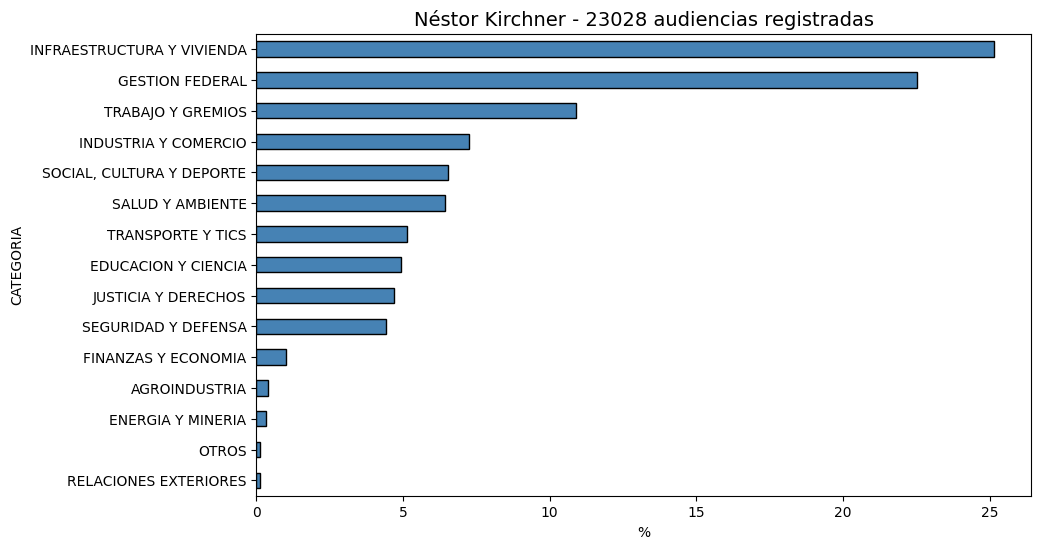

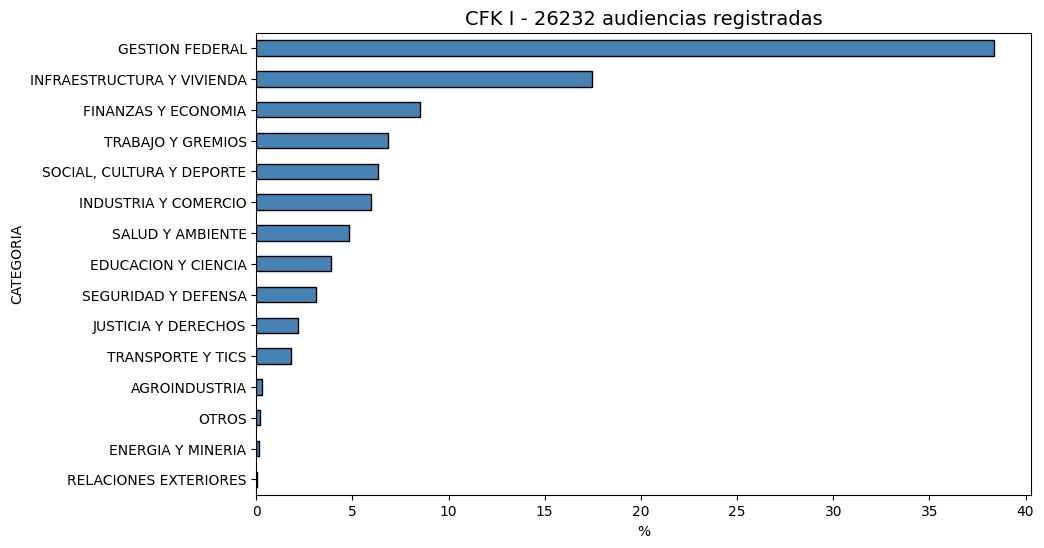

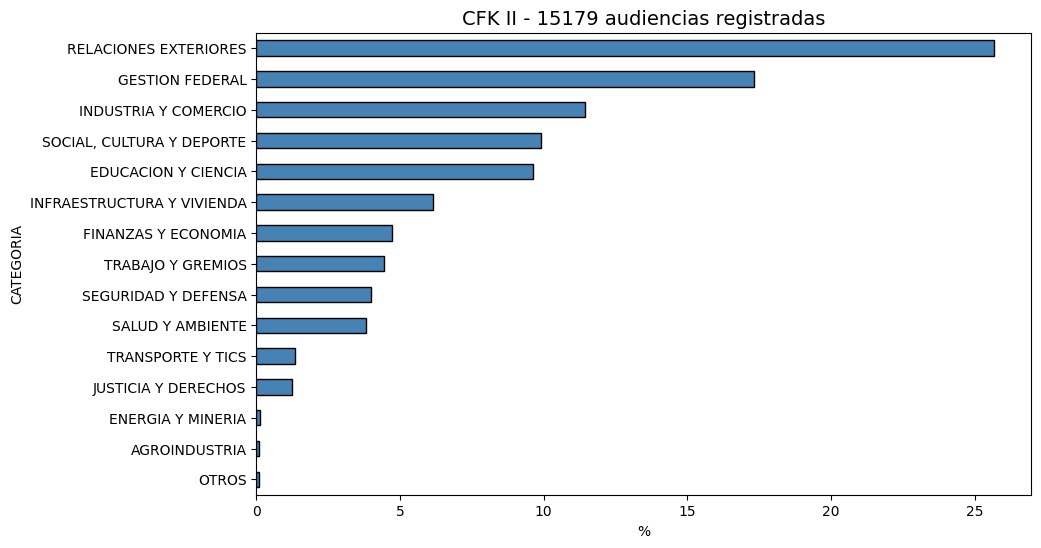

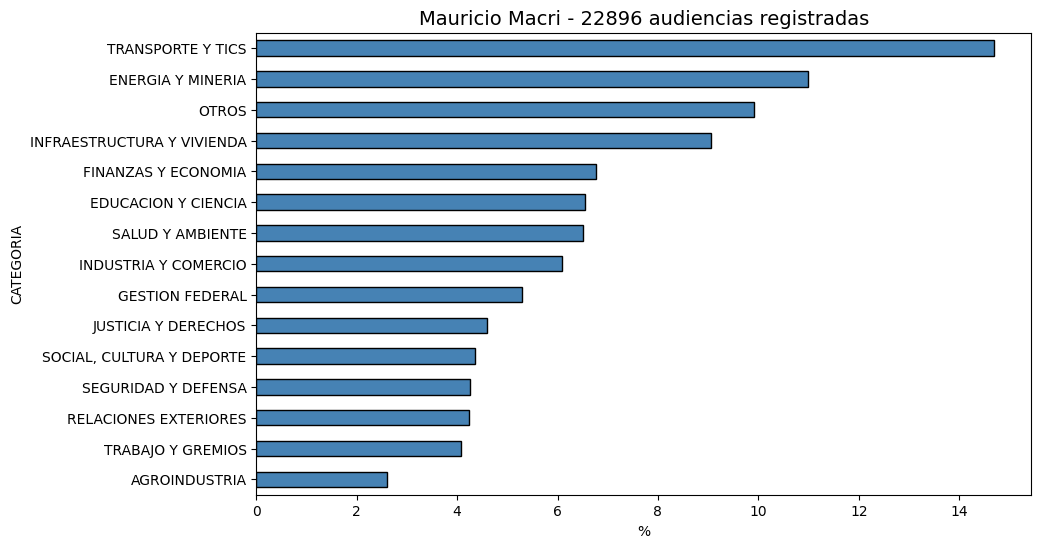

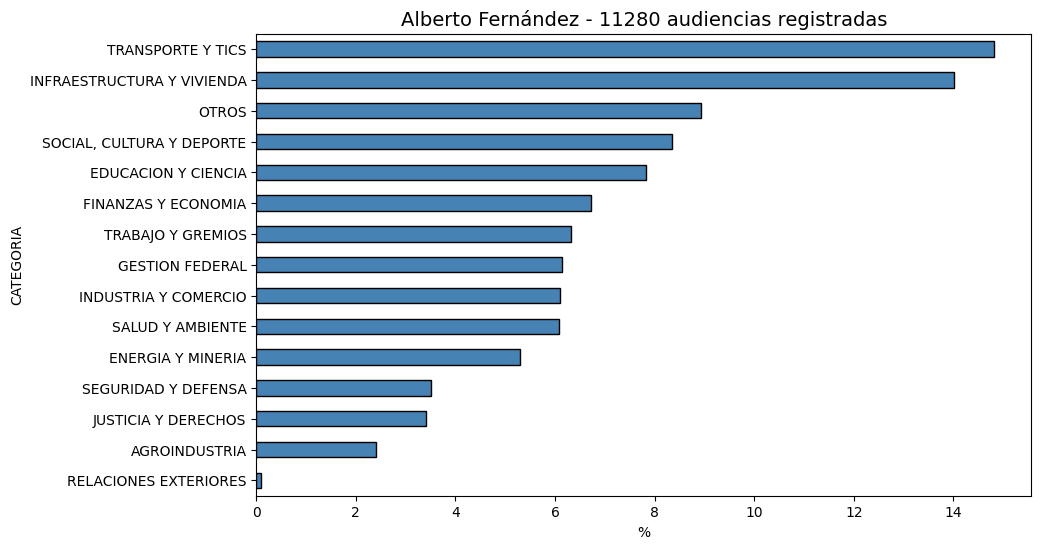

In [28]:
for presidente in orden:
    data = df[df['GOBIERNO'] == presidente]
    total = len(data)
    conteo = (data['CATEGORIA'].value_counts(normalize=True) * 100).sort_values(ascending=True)
    plt.figure(figsize=(10, 6))
    conteo.plot(kind='barh', color='steelblue', edgecolor='black')
    plt.title(f'{presidente} - {total} audiencias registradas', fontsize=14)
    plt.xlabel('%')